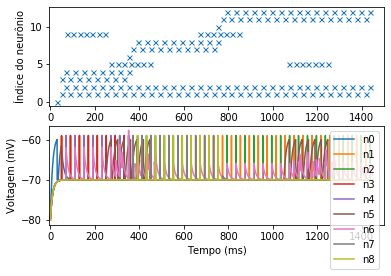

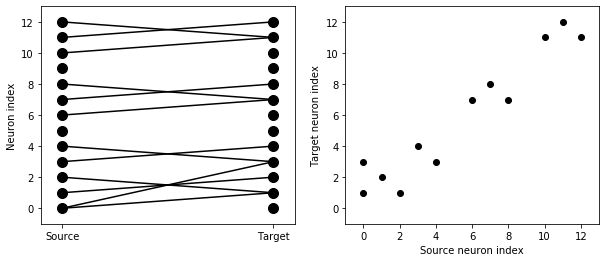

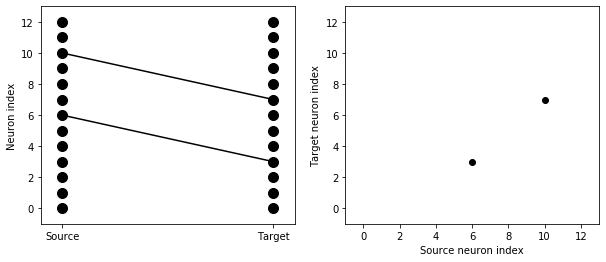

In [10]:
from brian2 import *
%matplotlib inline

N = 13 # Número de neurônios
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms
R = 100*Mohm
w_exc = 11*mV # Peso sináptico
w_exc_AND = 4*mV # Peso sináptico #8mv peso para 1 entrada e clock. 5mV para 2 entradas e clock
w_inh = -10*mV

# Modelo Leaky Integrate and Fire LIF
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação dos neurônios
neurons = NeuronGroup(N, eqs, threshold = 'v > -60.0*mV', reset = 'v = vrest', refractory = 5*ms, method = 'linear')

#Criação da sinapse excitatória dos loops (clock e estados)
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay = 20*ms)
syn_ex.connect(i=0, j=1) # stimulus
syn_ex.connect(i=0, j=3) # stimulus

syn_ex.connect(i=1, j=2) # Clock, n1
syn_ex.connect(i=2, j=1)

syn_ex.connect(i=3, j=4) # Estado Sa, n3
syn_ex.connect(i=4, j=3)

syn_ex.connect(i=6, j=7) # Lógica AND
syn_ex.connect(i=7, j=8) # Estado Sb, n7
syn_ex.connect(i=8, j=7)

syn_ex.connect(i=10, j=11) # Lógica AND
syn_ex.connect(i=11, j=12) # Estado Sc, n11
syn_ex.connect(i=12, j=11)

#Criação da sinapse excitatória da AND
syn_ex_AND = Synapses(neurons, neurons, on_pre='v_post += w_exc_AND', delay = 20*ms)
syn_ex_AND.connect(i=1, j=6)
syn_ex_AND.connect(i=3, j=6)
syn_ex_AND.connect(i=5, j=6)

syn_ex_AND.connect(i=1, j=10)
syn_ex_AND.connect(i=7, j=10)
syn_ex_AND.connect(i=9, j=10)

#Criação da sinapse inibitória
syn_in = Synapses(neurons, neurons, on_pre='v_post += w_inh', delay = 20*ms)
syn_in.connect(i=6, j=3)
syn_in.connect(i=10, j=7)

#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

#Valores iniciais de tensão e corrente na entrada dos neurônios
neurons.v = -80*mV

neurons.I = [110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]*pA 
run (50*ms)  

neurons.I = [0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 0, 0]*pA
run (200*ms) 

neurons.I = [0, 0, 0, 0, 0, 110, 0, 0, 0, 0, 0, 0, 0]*pA
run (200*ms) 

neurons.I = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]*pA
run (200*ms) 

neurons.I = [0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 0, 0]*pA
run (200*ms) 

neurons.I = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]*pA
run (200*ms) 

neurons.I = [0, 0, 0, 0, 0, 110, 0, 0, 0, 0, 0, 0, 0]*pA
run (200*ms) 

neurons.I = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]*pA
run (200*ms) 

# Raster plot
subplot(211)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 1500)
#ylim(-1, 4)

#subplot(312)
#plot(rate_mon.t/ms,rate_mon.rate/Hz)
#xlabel('Tempo (ms)')
#ylabel('Índice do neurônio')
#xlim(-5, 250)

# Tensão de disparos
subplot(212)
plot(state_mon.t/ms, state_mon.v[0]/mV, label="n0")
plot(state_mon.t/ms, state_mon.v[1]/mV, label="n1")
plot(state_mon.t/ms, state_mon.v[2]/mV, label="n2")
plot(state_mon.t/ms, state_mon.v[3]/mV, label="n3")
plot(state_mon.t/ms, state_mon.v[4]/mV, label="n4")
plot(state_mon.t/ms, state_mon.v[5]/mV, label="n5")
plot(state_mon.t/ms, state_mon.v[6]/mV, label="n6")
plot(state_mon.t/ms, state_mon.v[7]/mV, label="n7")
plot(state_mon.t/ms, state_mon.v[8]/mV, label="n8")
xlabel('Tempo (ms)')
ylabel('Voltagem (mV)')
xlim(-5, 1500)
legend()

show()

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(syn_ex)
visualise_connectivity(syn_in)